In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
import pickle

pd.set_option('display.max_columns',None)


In [5]:
df = pd.read_csv('../data/raw_data/maternal_health_clean.csv')
df.shape
df.copy()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [6]:
X = df.drop('RiskLevel' , axis=1)
Y = df['RiskLevel']

In [37]:
X = df.drop('RiskLevel' , axis=1)
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,risk_encoded
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [7]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [8]:
Y.head()

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object

In [9]:
X.shape

(1014, 6)

In [10]:
Y.shape

(1014,)

In [11]:
Y.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [12]:
import pandas as pd

mapping = {
    "low risk": 0,
    "mid risk": 1,
    "high risk": 2
}

df["risk_encoded"] = df["RiskLevel"].map(mapping)


In [13]:
pd.DataFrame({
    "Original": df["RiskLevel"],
    "Encoded": df["risk_encoded"]
}).drop_duplicates()


,Original,Encoded
0,high risk,2
4,low risk,0
6,mid risk,1


In [14]:
pd.DataFrame({
    'Original': Y.head(10),
    'Encoded': df["risk_encoded"][:10]
})    

,Original,Encoded
0,high risk,2
1,high risk,2
2,high risk,2
3,high risk,2
4,low risk,0
5,high risk,2
6,mid risk,1
7,high risk,2
8,mid risk,1
9,high risk,2


In [15]:
X.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
dtype: int64

In [16]:
X.duplicated().sum()

np.int64(598)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,
    df["risk_encoded"],
    test_size = 0.2,
    random_state = 42,
    stratify=df["risk_encoded"]
)    

In [18]:
X_train.shape

(811, 6)

In [19]:
X_test.shape

(203, 6)

In [20]:
pd.DataFrame({
    'Set' : ['Training' , 'Test' , 'Total'],
    'Samples' : [len(X_train), len(X_test), len(X)]
})    

,Set,Samples
0,Training,811
1,Test,203
2,Total,1014


In [21]:
# Training set
pd.Series(Y_train).value_counts().sort_index()


risk_encoded
0    325
1    269
2    217
Name: count, dtype: int64

In [22]:
# Test set
pd.Series(Y_test).value_counts().sort_index()

risk_encoded
0    81
1    67
2    55
Name: count, dtype: int64

In [23]:
# Percentage comparison
pd.DataFrame({
    'Train_Count': pd.Series(Y_train).value_counts().sort_index(),
    'Test_Count': pd.Series(Y_test).value_counts().sort_index(),
    'Train_%': pd.Series(Y_train).value_counts(normalize=True).sort_index() * 100,
    'Test_%': pd.Series(Y_test).value_counts(normalize=True).sort_index() * 100
})

,Train_Count,Test_Count,Train_%,Test_%
risk_encoded,,,,
0,325,81,40.073983,39.901478
1,269,67,33.168927,33.004926
2,217,55,26.757090,27.093596


In [24]:
scaler = StandardScaler()

scaler.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Before scaling - Training data
X_train.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,29.912454,113.104809,76.290999,8.655758,98.663379,74.115906
std,13.505316,18.435744,13.798968,3.204997,1.372851,8.276928
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,38.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [27]:
# After scaling - Training data (mean≈0, std≈1)
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02
mean,7.009053e-17,3.395010e-16,2.365555e-16,2.299845e-16,-2.006341e-15,6.439567e-16
std,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00
min,-1.475326e+00,-2.339553e+00,-1.978977e+00,-8.291418e-01,-4.835106e-01,-8.113798e+00
25%,-8.085103e-01,-7.112756e-01,-8.187545e-01,-5.481570e-01,-4.835106e-01,-4.975815e-01
50%,-2.898761e-01,3.742429e-01,2.689542e-01,-3.608339e-01,-4.835106e-01,2.277725e-01
75%,5.992112e-01,3.742429e-01,9.940933e-01,-2.047312e-01,-4.835106e-01,7.113418e-01
max,2.970111e+00,2.545280e+00,1.719232e+00,3.229527e+00,3.160794e+00,1.920265e+00


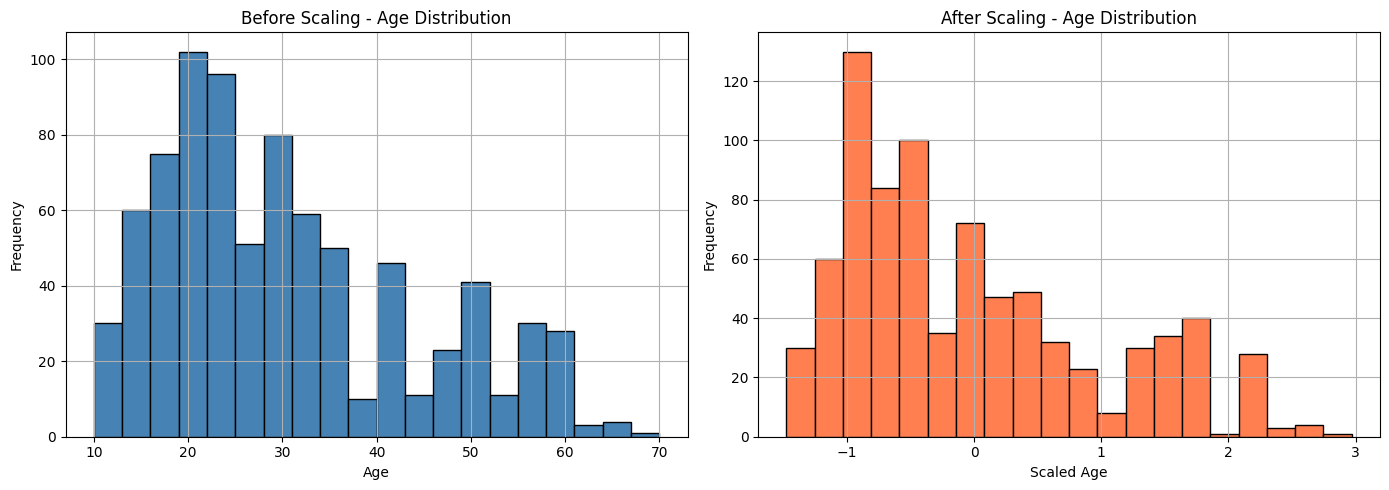

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
X_train['Age'].hist(bins=20, ax=axes[0], edgecolor='black', color='steelblue')
axes[0].set_title('Before Scaling - Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# After scaling
pd.DataFrame(X_train_scaled, columns=X_train.columns)['Age'].hist(
    bins=20, ax=axes[1], edgecolor='black', color='coral'
)
axes[1].set_title('After Scaling - Age Distribution')
axes[1].set_xlabel('Scaled Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../output/visualizations/scaling_comparison.png', dpi=300)
plt.show()

In [29]:
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [30]:
with open("../models/risk_mapping.pkl", "wb") as f:
    pickle.dump(mapping, f)

In [31]:
feature_names = X.columns.tolist()

with open('../models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

In [32]:
# Save scaled data
np.save('../data/processed_data/X_train_scaled.npy', X_train_scaled)
np.save('../data/processed_data/X_test_scaled.npy', X_test_scaled)
np.save('../data/processed_data/y_train.npy', Y_train)
np.save('../data/processed_data/y_test.npy', Y_test)

In [33]:
X_train.to_csv('../data/processed_data/X_train.csv', index=False)
X_test.to_csv('../data/processed_data/X_test.csv', index=False)
pd.Series(Y_train, name='RiskLevel').to_csv('../data/processed_data/Y_train.csv', index=False)
pd.Series(Y_test, name='RiskLevel').to_csv('../data/processed_data/Y_test.csv', index=False)

# Preprocessing Summary

In [34]:
summary = pd.DataFrame({
    'Stage': [
        'Original Dataset',
        'Features (X)',
        'Target (y)',
        'Training Set (80%)',
        'Test Set (20%)',
        'Number of Features',
        'Number of Classes',
        'Scaled',
        'Missing Values',
        'Duplicates'
    ],
    'Details': [
        f"{df.shape[0]} rows × {df.shape[1]} columns",
        f"{X.shape[0]} rows × {X.shape[1]} columns",
        f"{len(Y)} values",
        f"{X_train.shape[0]} samples",
        f"{X_test.shape[0]} samples",
        X.shape[1],
        len(np.unique(df["risk_encoded"])),
        'Yes (StandardScaler)',
        '0',
        '0'
    ]
})
summary

,Stage,Details
0,Original Dataset,1014 rows × 8 columns
1,Features (X),1014 rows × 6 columns
2,Target (y),1014 values
3,Training Set (80%),811 samples
4,Test Set (20%),203 samples
5,Number of Features,6
6,Number of Classes,3
7,Scaled,Yes (StandardScaler)
8,Missing Values,0
9,Duplicates,0


In [35]:
X.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

In [36]:
files_created = [
    '../data/processed/X_train_scaled.npy',
    '../data/processed/X_test_scaled.npy',
    '../data/processed/y_train.npy',
    '../data/processed/y_test.npy',
    '../data/processed/X_train.csv',
    '../data/processed/X_test.csv',
    '../models/scaler.pkl',
    '../models/risk_mapping.pkl',
    '../models/feature_names.pkl'
]

for file in files_created:
    print(f"✅ {file}")

✅ ../data/processed/X_train_scaled.npy
✅ ../data/processed/X_test_scaled.npy
✅ ../data/processed/y_train.npy
✅ ../data/processed/y_test.npy
✅ ../data/processed/X_train.csv
✅ ../data/processed/X_test.csv
✅ ../models/scaler.pkl
✅ ../models/risk_mapping.pkl
✅ ../models/feature_names.pkl


In [40]:
import pandas as pd

df = pd.read_csv('../data/raw_data/maternal_health_clean.csv')

print("Class distribution:")
print(df['RiskLevel'].value_counts())
print("\nPercentages:")
print(df['RiskLevel'].value_counts(normalize=True) * 100)

Class distribution:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

Percentages:
RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64
